<a href="https://colab.research.google.com/github/AlbertoBassanoni/MLPNS_ABassanoni/blob/main/Central_Limit_Theorem_Chi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2: Central Limit Theorem

Facciamo un'applicazione del central limit theorem per la chi2 distribution.

In [1]:
# Garantisce la compatibilità di alcune funzioni tra Python 2 e Python 3
from __future__ import print_function, division

# importazione dei pacchetti compilati già visti in Python Bootcamp
import numpy as np
import scipy as sp
from scipy import stats

# questo è per l'extra credit
from scipy.optimize import curve_fit, minimize

# pylab serve per i plotting
import pylab as pl
%pylab inline
import seaborn
seaborn.set_style("darkgrid")

Populating the interactive namespace from numpy and matplotlib


In [2]:
#setto il seed per avere gli stessi risultati nella generazione di numeri random
np.random.seed(456)

#settiamo una media che voglio io
mymean=100

Text(0.5, 0, 'x')

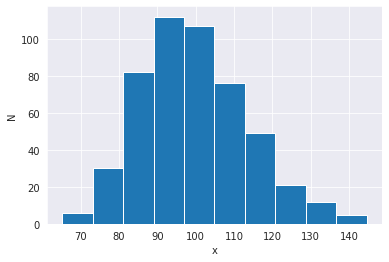

In [3]:
#per la chi square distribution il degree of freedom si ricava dalla media essendo:
#mean_chi2= k (vedi Wikipedia)
df = mymean 

#per una binomial ad esempio:
#mean_binomial= n*p
#p = 0.5 
#n = mymean/p

#creo un dizionario

mydistribution = {}

# esempio di distribuzione

pl.hist(np.random.chisquare(mymean, size=500));
pl.ylabel("N")
pl.xlabel("x")


In [4]:
mysize = (np.random.rand(100))
mysize

array([0.49849045, 0.61100301, 0.28164421, 0.5459032 , 0.11408284,
       0.65735388, 0.41193067, 0.90436033, 0.57099108, 0.67706228,
       0.38562863, 0.0971174 , 0.75055404, 0.41110519, 0.84403549,
       0.98540984, 0.01568833, 0.84868674, 0.50979263, 0.94763371,
       0.69222357, 0.2000041 , 0.37141067, 0.09148377, 0.12666006,
       0.68440565, 0.69145626, 0.87927294, 0.01629363, 0.59516122,
       0.49024117, 0.18997054, 0.12537943, 0.92460873, 0.51346378,
       0.23019547, 0.32239754, 0.79530249, 0.78147407, 0.97866603,
       0.10222761, 0.42617224, 0.22147331, 0.01600411, 0.66521301,
       0.84019615, 0.50286594, 0.69118933, 0.94683586, 0.59233211,
       0.4135054 , 0.33844734, 0.44972429, 0.40498382, 0.57128487,
       0.33600872, 0.77002579, 0.38566399, 0.72808339, 0.73522364,
       0.60129877, 0.11369917, 0.97424827, 0.83130108, 0.87110043,
       0.9465412 , 0.41222389, 0.12725016, 0.67183702, 0.77463917,
       0.67212095, 0.86998404, 0.23523771, 0.40151812, 0.80348

In [5]:
mysize = (np.random.rand(100))*2000
mysize

array([9.91418121e+02, 1.79063085e+03, 1.29907097e+00, 8.31494739e+01,
       1.89058970e+03, 1.16532657e+03, 1.31549160e+03, 7.14104815e+02,
       6.36998942e+02, 1.17500779e+03, 1.53280903e+03, 1.25894644e+03,
       1.02198047e+03, 2.17755514e+02, 3.95651119e+02, 1.66210067e+03,
       1.51375455e+03, 2.67376903e+02, 1.25063068e+03, 1.42605248e+03,
       9.08117636e+02, 1.51432448e+03, 1.38899913e+03, 3.82418508e+02,
       1.95245470e+03, 1.62212567e+03, 7.57230756e+02, 5.08081980e+02,
       1.75766320e+03, 1.54523835e+01, 4.02178973e+02, 9.42463442e+01,
       1.94060902e+03, 1.22546103e+03, 6.29029061e+02, 5.85427525e+02,
       1.60838016e+03, 3.07945281e+02, 4.18918275e+02, 1.14680461e+03,
       1.50676707e+03, 3.49282918e+01, 1.40227614e+03, 1.53098447e+03,
       1.07749378e+03, 9.49818416e+02, 1.68604722e+03, 6.42243146e+02,
       2.31871635e+02, 1.89152224e+03, 1.02632154e+03, 1.06549785e+02,
       1.60352063e+03, 1.64412308e+03, 9.88085146e+02, 1.80917912e+03,
      

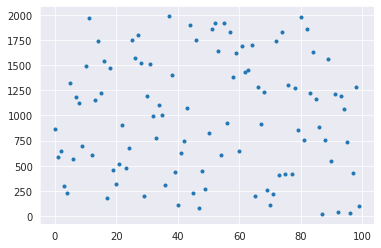

In [13]:
#ho generato 100 samples per la chi2 avente size compresa tra 10 e 2000

mysize = (np.random.rand(100) *2000).astype(int)
mysize[mysize < 10]= 10
pl.plot(mysize, '.')

Text(0, 0.5, 'sample mean')

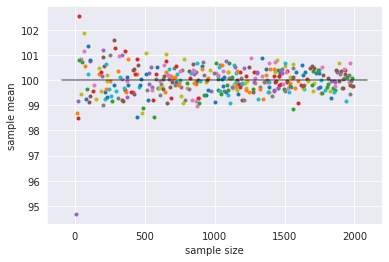

In [14]:
#mysize contiene la size della distribuzione dei miei samples

for s in mysize:
  #nel mio dizionario introduco un keyword s e un value s con gli
  #array nella distribuzione
  #nel dizionario posso mettere oggetti di diversa dimensione
  mydistribution[s] = np.random.chisquare(mymean, size=s)

#creo la figura vuota
ax = pl.figure().add_subplot(111)

for d in mydistribution.keys():
  #plotto le 100 mean delle mie distribuzioni casuali con size casuale 
  ax.plot(d, mydistribution[d].mean(), '.')
ax.plot(pl.xlim(), [100, 100], 'k', alpha=0.5)
ax.set_xlabel("sample size")
ax.set_ylabel("sample mean")